In [142]:
%matplotlib inline

# VIP, Vortex Image Processing pipeline

# Table of contents

* [1. VIP pipeline introduction](#1.-VIP-pipeline)
    - [1.1. What is it?](#1.1.-What-is-it?)
    - [1.2. Motivation](#1.2.-Motivation)
    - [1.3. How to get VIP?](#1.3.-Where-to-get-VIP?)
    - [1.4. How to install it?](#1.4.-How-to-install-it?)
* [2. Package structure](#2.-Package-structure)
* [3. Short tutorial](#3.-Short-tutorial)
    - [3.1 Importing VIP](#3.1.-Importing-VIP)
    - [3.2. Getting the data, ADI cube](#3.2.-Getting-the-data,-ADI-cube)
    - [3.3. Processing the cube](#3.3.-Processing-the-cube)
* [4. Additional stuff](#4.-Additional-stuff)

## 1. VIP pipeline introduction 

This is a poster that turned into talk. Why not to try a live tutorial?

In [342]:
from IPython.display import YouTubeVideo
YouTubeVideo('IW7Rqwwth84')

Let's hope for the best and give it a try.

### 1.1. What is it?

Vortex Image Processing (VIP) is a package/pipeline for angular and spectral differential high-contrast imaging written in Python 2.7.

VIP is being developed within the VORTEX team (mainly @ University of Liege, Belgium).
The source code is in alpha version meaning that the code will change drastically before the
first release version. If you want to report a bug, suggest a feature or even add one please contact the main developer at cgomez [at] ulg.ac.be or through github. Any feedback will be greatly appreciated.

### 1.2. Motivation

#### 1.2.1. Why VIP?

Our goal is to provide robust, efficient (as fast as possible), easy-to-use, well- documented and freely available implementation of high-contrast image processing algorithms to the scientific community. The code starts as my PhD project, which focus is on studying new algorithms for high-contrast imaging and exoplanet detection. Future new algorithms are going to be distributed through the same channel (next one at Lyot2015, Montreal).

#### 1.2.2. Why python?

VIP is written in Python 2.7. It was chosen for being an open-source high level programming language, able to express a large amount of functionality per line of code. Python has a vast ecosystem of scientific open-source libraries/packages (e.g. numpy, scipy, scikit-learn, scikit-image) and many well-known codes have python bindings as well (e.g. opencv). 

On top of that exist this great tool, the Jupyter (né IPython) notebook. A notebook file is simple a JSON document, containing text, source code, rich media output, and metadata. It allows to combine data analysis and visualization into an easily sharable format. This tutorial is an example of a Jupyter notebook.

### 1.3. Where to get VIP? 

We've published the code in a Git public repository (github):

https://github.com/carlgogo/vip_exoplanets

Git is a distributed resivison control and source code management developed by Linus Trovalds for Linux kernel development back in 2005. You may be familiar with other version control systems: SVN, Mercurial, CVS. Nowadays most of the scientific open-source python code lives in github.

You can clone the repository with github or download a zip file. For cloning the repository first you need to get Git running on your system, then:

Optionally you can go to the webpage and download a zip file of the source code.

### 1.4. How to install it?

The setup is pretty much automatic. First you must have a python distribution installed (e.g. Canopy, Anaconda, MacPorts). Recomendation: use Anaconda.

There is one dependency that is tricky to get install (compile), but having Anaconda python distribution the process it's just a command (make sure you have a C compiler installed in your system, like g++). With conda (anaconda) just type:

A setup.py file (Setuptools Python package) is included in the root folder of VIP. It takes care of installing the dependencies (see REQUIREMENTS) for you.
For running setup.py do:

The code is in continuous development and will be changing often. It's prefered 
to 'install' with the develop flag:

In any case wait a couple of minutes until all the requirements are satisfied.

## 2. Package structure

Basic image processing functionalities are available e.g. image registration, image rotation, pixel temporal and spatial subsampling, bad frame detection, among others. The Point Spread Function (PSF) subtraction and speckle noise removal, for this development version, are based on Principal Component Analysis (PCA) or Karhunen–Loeve transform. The PCA algorithm can work on the whole frames or in localized patches performing frame selection based on the amount of field rotation. Also, basic median frame subtraction is included as in the original ADI routine. Other functionalities included are: Signal-to-noise ratio (SNR) estimation, SNR map generation, algorithm throughput and fake companion injection.

In [1]:
import vip

------------------------------------
 oooooo     oooo ooooo ooooooooo.   
  `888.     .8'  `888' `888   `Y88. 
   `888.   .8'    888   888   .d88' 
    `888. .8'     888   888ooo88P'  
     `888.8'      888   888         
      `888'       888   888         
       `8'       o888o o888o        
------------------------------------
  Vortex Image Processing pipeline  
------------------------------------


In [138]:
dir(vip)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'calib',
 'conf',
 'exlib',
 'fits',
 'madi',
 'pca',
 'phot',
 'stats',
 'var']

The subpackage __"calib"__ contains some useful cosmetics and calibration functions: 
- frame resizing (upsampling/pixel binning, opencv fast processing)
- frames shifting (opencv fast processing)
- frames and cubes rotation (opencv fast processing) 
- frames and cubes cropping (numpy fast indexing)
- bad pixel removal from frames
- bad frames detection from cubes
    - pixel statistics in annulus or circular aperture
    - ellipticity of a point like source
    - frames correlation
- cube temporal subsampling
    - mean
    - median
    - trimmed mean
- frames registration (re-centering)
    - center of mass
    - centroid fitting a 2d gaussian
    - DFT upsampling (Guizar et al. 2008)
    - radon transform for broadband frames (Pueyo et al. 2014)

Astronomical calibration functionality like flat fielding and dark-sky subtraction, in spite of its simplicity where deprecated from the code due to the intrinsic complexity of dealing with heterogeneous datasets coming from different observatories (different data storage and handling). You can do this stuff in python in procedures of a few lines.

Subpackage __"conf"__ contains configuration functions, constant storage and other helping functions.

Subpackage __"exlib"__ contains external libraries self contained in VIP. For the moment only some DS9 bindings (by Andrew Williams, found somewhere on the internet).

Subpackage __"fits"__ includes fits handling functions:
- fits opening
- fits info
- fits writing
- ADI cube opening (cube with PA attached as HDU extension)
- DS9 displaying

Subpackage __"madi"__ has the ADI cube basic processing (Marois et al. 2006): median frame subtraction, and annular mode where 4 closest frames taking into account a PA threshold are median collapsed and subtracted.

In subpackage __"pca"__ are the PCA based algorithms for ADI (Soumer et al. 2012) cubes processing, soon SDI will be commited. PCA comes in different flavors and with speed modifications:
- PCA on full frames, using the whole cube as the PCA reference library
    - Big data matrix NxP, where N is the number of frames and P the number of pixels in a frame
    - PCA through eigendecomposition of the covariance matrix (~$DD^T$) or the SVD of the centered data matrix
    - SVD using different libraries. Faster one (default option): randomized SVD (Halko et al. 2009)
- annular, and annular quadrant versions, with PA rejection for allowing FOV rotation and avoid planet selfsubstraction. This local PCA algorithm processes many (PAT x FR) smaller matrices at takes much more time
- parallel version of this local PCA algorithm to use all the available cores (multiprocessing)

Subpackage __"phot"__ contains:
- detection functionality
- fake companions injection 
- PCA algorithm throughput
- signal-to-noise estimation
- snr map generation

Subpackage __"stats"__ has various statistic related functions. 

Subpackage __"var"__ has helping functions for image filtering, shapes extraction (annulus, squares subimages, circular apertures) and others.

Some features are comming in a few days, e.g. robust flux and astrometry estimation using negative fake companion technique coupled with a MCMC approach.

## 3. Short tutorial

### 3.1. Importing VIP

For interactive mode execute Ipython shell and import the package:

For reviewing all the subpackages available:

In [140]:
vip.

For displaying the docstring (use question mark):

In [141]:
vip.pca.pca?

In [146]:
ls

Tutorial.ipynb     naco_betapic.fits  psf.fits


### 3.2. Getting the data, ADI cube

Let's get the fits info:

In [18]:
vip.fits.info_fits('naco_betapic.fits')

Filename: naco_betapic.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   (101, 101, 61)   float32   
1                ImageHDU         7   (1, 61)      float64   


Now we open the fits, get the data "in" memory:

In [14]:
cube, ang = vip.fits.open_adicube('naco_betapic.fits')


Fits HDU:0 data successfully loaded. Data shape: [61,101,101]

Fits HDU:1 data successfully loaded. Data shape: [61]


In [25]:
psf = vip.fits.open_fits('psf.fits')


Fits HDU:0 data successfully loaded. Data shape: [39,39]


This cube is way smaller cube than a usual cube due to subsampling and cropping.

Let's display it in ds9:

In [19]:
vip.fits.display_array_ds9(cube)

Let's create some convenient aliases:

In [143]:
ds9 = vip.fits.display_array_ds9
plots = vip.var.pp_subplots
plot_histo = vip.stats.frame_histo_stats

In [147]:
ds9(psf)

### 3.3. Processing the cube

ADI processing:

In [73]:
fr_adi = vip.madi.adi(cube, ang, mode='simple')

-------------------------------------------------------------------
Starting time: 2015-05-24 22:07:02
-------------------------------------------------------------------
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.024474
-------------------------------------------------------------------


Plotting with histogram:

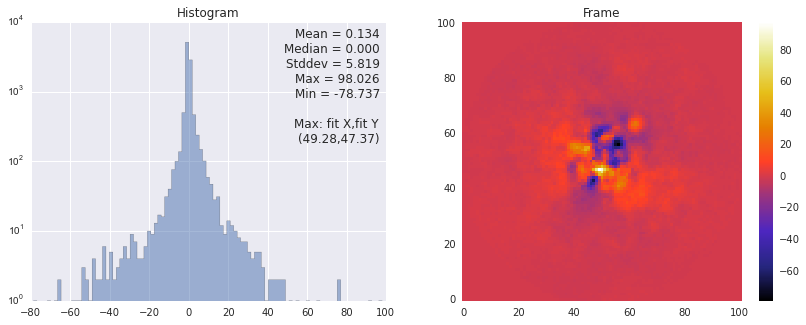

(0.13369638, 0.0, 5.8190656, 98.026131, -78.737228)

In [316]:
plot_histo(fr_adi)

Let's try the detection module, providing the processed frame, the FWHM in pixels and a PSF (what the planet should look like):

In [163]:
vip.phot.detection?

Let's try the Laplacian of Gaussian method blob detection in computer vision (http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_log). It computes the Laplacian of Gaussian images with successively increasing standard deviation and stacks them up in a cube. Blobs are local maximas in this cube.

Sigma clipped median = 0.000
Sigma clipped stddev = 2.098
Background threshold = 10.492

Input frame after matched filtering


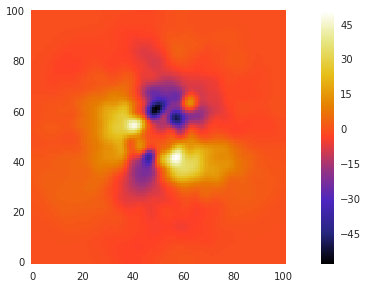

Blobs found: 3
 ycen   xcen
------ ------
  42 	57
  55 	41
  63 	62

_________________________________________
Y,X = (42,57) -------------------------
SNR constraint NOT fulfilled


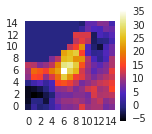

Coordinates of chosen px Y,X = 42,57
Central pixel SNR: 
SNR = 1.85219809027
Flux = 325.452, Mean Flux BKG aper = -48.473
Stddev BKG aper = 195.471
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 325.452
Mean SNR = 1.780
Max SNR = 2.045, stddev SNRs = 0.160
-----------------------------------------
Fitted Y,X = 40.270,59.236

_________________________________________
Y,X = (55,41) -------------------------
SNR constraint NOT fulfilled


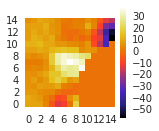

Coordinates of chosen px Y,X = 55,41
Central pixel SNR: 
SNR = 2.17575953486
Flux = 379.210, Mean Flux BKG aper = -43.120
Stddev BKG aper = 187.943
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 379.210
Mean SNR = 2.000
Max SNR = 2.239, stddev SNRs = 0.184
-----------------------------------------
Fitted Y,X = 54.852,40.488

_________________________________________
Y,X = (63,62) -------------------------
SNR constraint NOT fulfilled


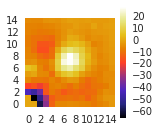

Coordinates of chosen px Y,X = 63,62
Central pixel SNR: 
SNR = 2.62648586612
Flux = 233.700, Mean Flux BKG aper = 13.377
Stddev BKG aper = 82.317
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 233.700
Mean SNR = 2.130
Max SNR = 2.662, stddev SNRs = 0.418
-----------------------------------------
Fitted Y,X = 63.333,62.095

_________________________________________
Input frame showing all the detected blobs
In red circles those that did not pass the SNR constraint
In cyan circles those that have and SNR >= 5


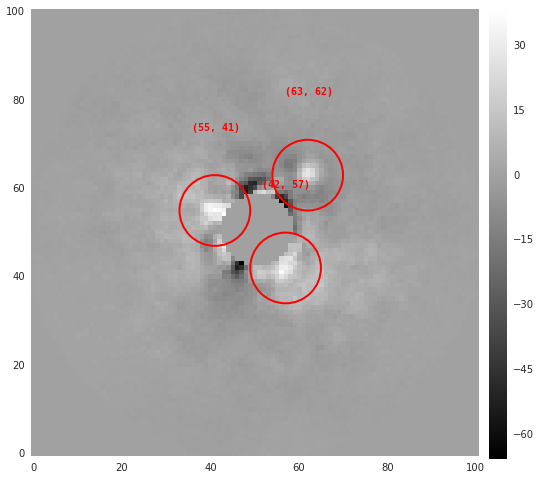

 y   x   px_val     px_snr   
--- --- ------- -------------
 63  62 27.4171 2.62648586612
 42  57 31.7374 1.85219809027
 55  41  38.324 2.17575953486


(array([], dtype=float64), array([], dtype=float64))

In [321]:
vip.phot.detection(fr_adi, fwhm, psf, debug=True, mode='log', snr_thresh=5)

How did we get the SNR there? Using Mawet el al. 2013 student t-test for high contrast imaging at small angles:

$$p_t(x,n_2−1)≡ \frac{\overline{x}_1 - \overline{x}_2}{s_2\sqrt{1+\frac{1}{n_2}}}􏰙$$

SNR = 2.62648586612
Flux = 233.700, Mean Flux BKG aper = 13.377
Stddev BKG aper = 82.317


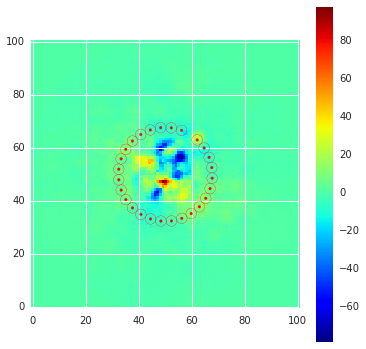

2.6264858661249417

In [322]:
vip.phot.snr_student(fr_adi, 63, 62, fwhm, plot=True)

Now let's try __PCA__ to get a cleaner image:

In [217]:
fr_pca1 = vip.pca.pca(cube, ang, ncomp=5, mask_center_px=2*fwhm)

-------------------------------------------------------------------
Starting time: 2015-05-25 23:00:02
-------------------------------------------------------------------
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:00.042521
-------------------------------------------------------------------
Done derotating and combining
Running time:  0:00:00.076290
-------------------------------------------------------------------


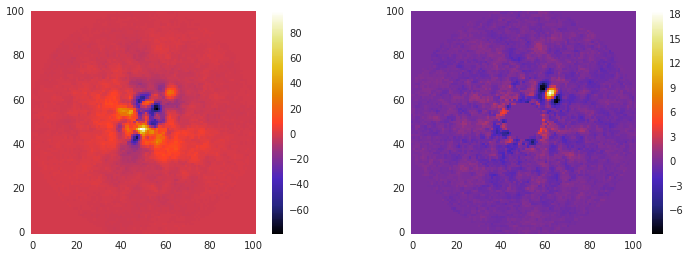

In [323]:
plots(fr_adi, fr_pca1)

Sigma clipped median = 0.000
Sigma clipped stddev = 0.215
Background threshold = 1.074

Input frame after matched filtering


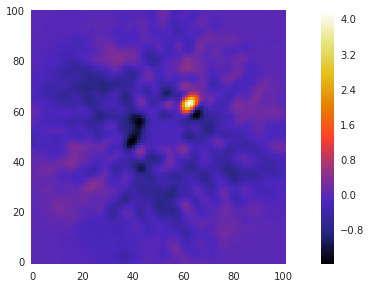

Blobs found: 1
 ycen   xcen
------ ------
  63 	62

_________________________________________
Y,X = (63,62) -------------------------


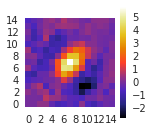

Coordinates of chosen px Y,X = 63,62
Central pixel SNR: 
SNR = 12.0710756421
Flux = 43.440, Mean Flux BKG aper = -1.871
Stddev BKG aper = 3.684
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 43.440
Mean SNR = 11.412
Max SNR = 15.600, stddev SNRs = 2.217
-----------------------------------------
Fitted Y,X = 62.869,62.079

_________________________________________
Input frame showing all the detected blobs
In red circles those that did not pass the SNR constraint
In cyan circles those that have and SNR >= 5


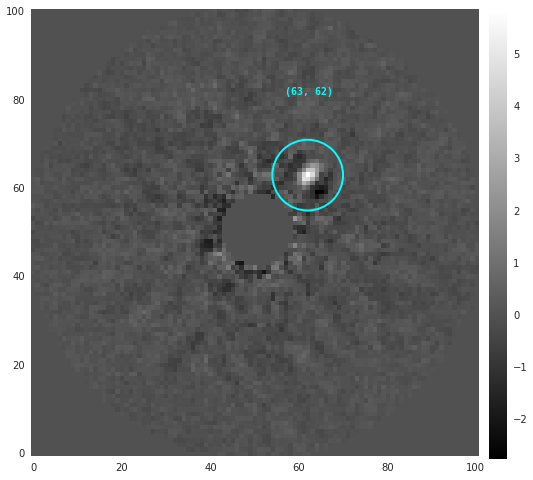

 y   x      px_val        px_snr   
--- --- ------------- -------------
 63  62 5.87051773071 12.0710756421


(array([63]), array([62]))

In [324]:
vip.phot.detection(fr_pca, fwhm, psf, debug=True, mode='log', snr_thresh=5)

Can we get a better SNR with full frame PCA?

In [221]:
opt_pcs = vip.pca.pca_optimize_snr(cube, ang, fwhm=fwhm, y=63, x=62, 
                                   mask_center_px=2*fwhm)

-------------------------------------------------------------------
Starting time: 2015-05-25 23:02:12
-------------------------------------------------------------------
Optimal # of PCs = 19 for mean SNR = 12.256
Running time:  0:00:03.237929
-------------------------------------------------------------------
Coordinates of chosen px Y,X = 63,62
Central pixel SNR: 
SNR = 15.5129865025
Flux = 27.800, Mean Flux BKG aper = -0.892
Stddev BKG aper = 1.815
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 27.800
Mean SNR = 12.256
Max SNR = 16.565, stddev SNRs = 2.668
-----------------------------------------
Fitted Y,X = 62.648,61.931


In [230]:
fr_pca2 = vip.pca.pca(cube, ang, ncomp=opt_pcs, mask_center_px=2*fwhm)

-------------------------------------------------------------------
Starting time: 2015-05-25 23:04:30
-------------------------------------------------------------------
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:00.057621
-------------------------------------------------------------------
Done derotating and combining
Running time:  0:00:00.100207
-------------------------------------------------------------------


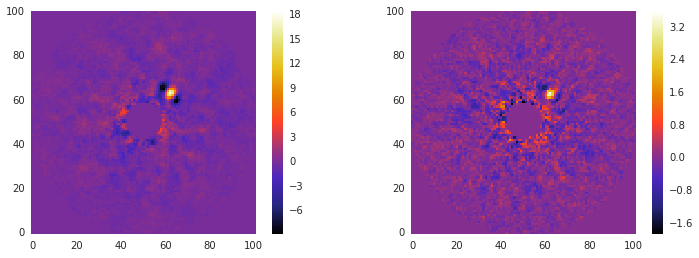

In [325]:
plots(fr_pca1, fr_pca2)

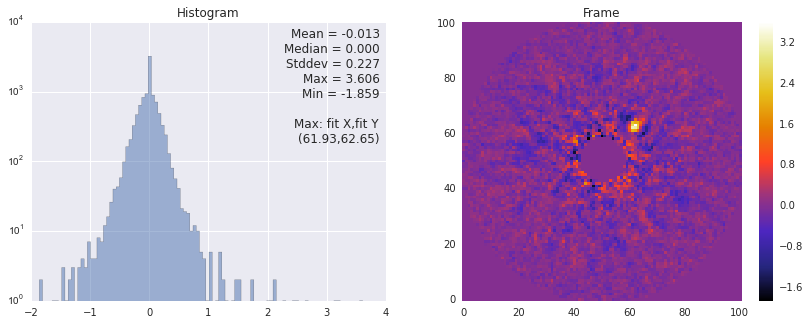

(-0.012755801900867499,
 0.0,
 0.22658621785079885,
 3.6060407161712646,
 -1.8586266040802002)

In [326]:
plot_histo(fr_pca2)

We can instead use the __local PCA__:

In [95]:
fwhm = 4 

In [259]:
fr_pca3 = vip.pca.subannular_pca(cube, ang, fwhm=fwhm, ncomp=20, asize=3, 
                                 radius_int=2*fwhm)

-------------------------------------------------------------------
Starting time: 2015-05-26 06:23:19
-------------------------------------------------------------------
# annuli = 3, Ann width = 12, FWHM = 4.000

PCA will be done locally per annulus and per quadrant.

Annulus 1, PA thresh = 16.37, Inn radius = 8.00, Ann center = 14.00 
Done PCA with randsvd for current annulus
Running time:  0:00:00.375747
-------------------------------------------------------------------
Annulus 2, PA thresh = 8.81, Inn radius = 20.00, Ann center = 26.00 
Done PCA with randsvd for current annulus
Running time:  0:00:00.898910
-------------------------------------------------------------------
Annulus 3, PA thresh = 6.19, Inn radius = 31.00, Ann center = 37.00 
Done PCA with randsvd for current annulus
Running time:  0:00:01.531539
-------------------------------------------------------------------
Done derotating and combining.
Running time:  0:00:01.554876
-----------------------------------------

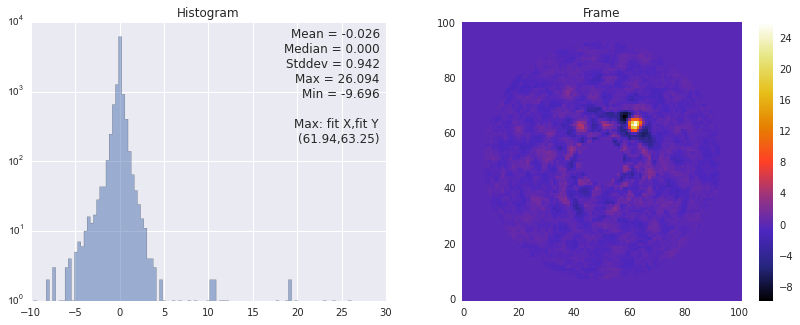

(-0.0264888, 0.0, 0.94245058, 26.093788, -9.695673)

In [327]:
plot_histo(fr_pca3)

Blobs found: 3
 ycen   xcen
------ ------
  62 	54
  63 	43
  63 	62

_________________________________________
Y,X = (62,54) -------------------------
SNR constraint NOT fulfilled
SNR = 1.088

_________________________________________
Y,X = (63,43) -------------------------
SNR constraint NOT fulfilled
SNR = 4.889

_________________________________________
Y,X = (63,62) -------------------------


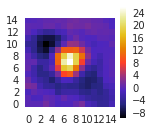

Coordinates of chosen px Y,X = 63,62
Central pixel SNR: 
SNR = 11.9599356197
Flux = 212.283, Mean Flux BKG aper = -5.839
Stddev BKG aper = 17.897
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 212.283
Mean SNR = 10.526
Max SNR = 13.776, stddev SNRs = 2.290
-----------------------------------------
Fitted Y,X = 63.250,61.935

_________________________________________
Input frame showing all the detected blobs
In red circles those that did not pass the SNR constraint
In cyan circles those that have and SNR >= 5


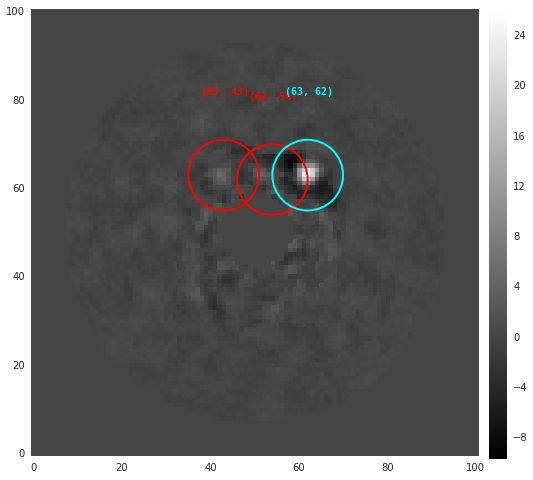

(array([63]), array([62]))

In [328]:
vip.phot.detection(fr_pca3, fwhm, psf, debug=False, mode='log', snr_thresh=5)

### Throughput

In [376]:
thr1 = vip.phot.throughput(cube, ang, psf, fwhm, n_comp=2, algo='pca', nbranch=1)\


Done frame cropping
-------------------------------------------------------------------
Starting time: 2015-05-26 08:39:18
-------------------------------------------------------------------
Cube without fake companions processed with pca.
Running time:  0:00:00.069483
-------------------------------------------------------------------
Measured annulus-wise noise in resulting frame.
Running time:  0:00:00.135151
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern 1/3).
Running time:  0:00:00.233988
-------------------------------------------------------------------
Cube with fake companions processed with pca.
Running time:  0:00:00.287804
-------------------------------------------------------------------
Measured the annulus-wise throughput of pca.
Running time:  0:00:00.288581
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern 2/3).
Running time:  0:00:00.375

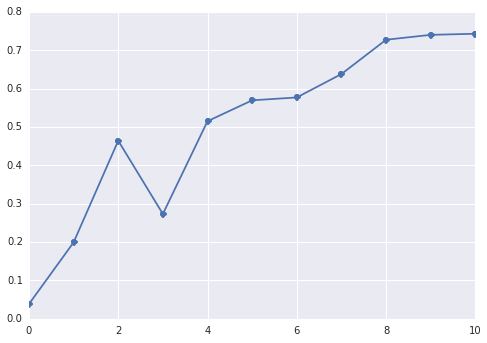

In [377]:
plot(thr1[0,:], 'o-')

In [374]:
thr2 = vip.phot.throughput(cube, ang, psf, fwhm, n_comp=2, algo='subspca', nbranch=1)


Done frame cropping
-------------------------------------------------------------------
Starting time: 2015-05-26 08:38:36
-------------------------------------------------------------------
Cube without fake companions processed with subannular_pca.
Running time:  0:00:02.261512
-------------------------------------------------------------------
Measured annulus-wise noise in resulting frame.
Running time:  0:00:02.313676
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern 1/3).
Running time:  0:00:02.409175
-------------------------------------------------------------------
Cube with fake companions processed with subannular_pca.
Running time:  0:00:04.815162
-------------------------------------------------------------------
Measured the annulus-wise throughput of subannular_pca.
Running time:  0:00:04.816385
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern

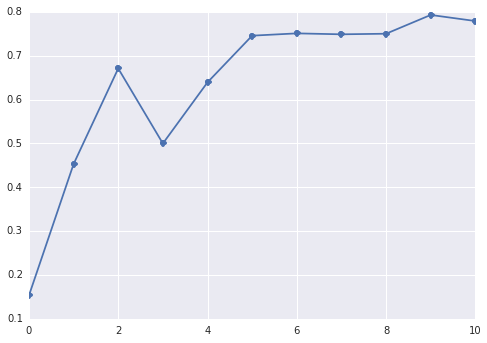

In [375]:
plot(thr2[0,:], 'o-')

Let's get an SNR map of the last processed frame:

In [262]:
snrmap = vip.phot.snr.snrmap(fr_pca3, fwhm)

-------------------------------------------------------------------
Starting time: 2015-05-26 06:24:10
-------------------------------------------------------------------
SNR map created using 2 processes.
Running time:  0:00:17.451774
-------------------------------------------------------------------


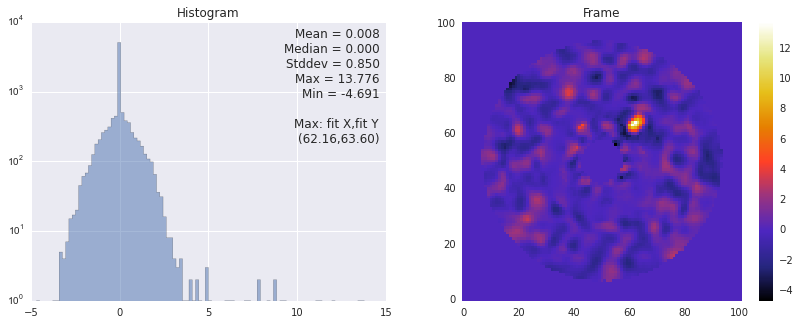

(0.0075528142, 0.0, 0.85025334, 13.776477, -4.6913123)

In [329]:
plot_histo(snrmap)

What else can we do with this cube and the psf? Inject a fake companions (with an arbitrary flux level):

In [266]:
vip.phot.inject_fcs_cube?

In [279]:
naco_plsc = 0.027
cubefc = vip.phot.inject_fcs_cube(cube, psf, ang, 200, naco_plsc, 
                                  [naco_plsc*35], theta=340, n_branches=1)

In [280]:
fr_pca4 = vip.pca.subannular_pca(cubefc, ang, fwhm=fwhm, ncomp=20, asize=3, 
                                 radius_int=2*fwhm)

-------------------------------------------------------------------
Starting time: 2015-05-26 06:30:13
-------------------------------------------------------------------
# annuli = 3, Ann width = 12, FWHM = 4.000

PCA will be done locally per annulus and per quadrant.

Annulus 1, PA thresh = 16.37, Inn radius = 8.00, Ann center = 14.00 
Done PCA with randsvd for current annulus
Running time:  0:00:00.366431
-------------------------------------------------------------------
Annulus 2, PA thresh = 8.81, Inn radius = 20.00, Ann center = 26.00 
Done PCA with randsvd for current annulus
Running time:  0:00:00.879768
-------------------------------------------------------------------
Annulus 3, PA thresh = 6.19, Inn radius = 31.00, Ann center = 37.00 
Done PCA with randsvd for current annulus
Running time:  0:00:01.556247
-------------------------------------------------------------------
Done derotating and combining.
Running time:  0:00:01.577144
-----------------------------------------

Blobs found: 3
 ycen   xcen
------ ------
  38 	83
  62 	54
  63 	62

_________________________________________
Y,X = (38,83) -------------------------


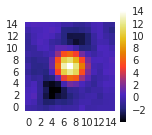

Coordinates of chosen px Y,X = 38,83
Central pixel SNR: 
SNR = 26.4201964736
Flux = 126.088, Mean Flux BKG aper = -2.479
Stddev BKG aper = 4.822
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 126.088
Mean SNR = 22.245
Max SNR = 30.731, stddev SNRs = 4.797
-----------------------------------------
Fitted Y,X = 37.964,83.026

_________________________________________
Y,X = (62,54) -------------------------
SNR constraint NOT fulfilled
SNR = 1.087

_________________________________________
Y,X = (63,62) -------------------------


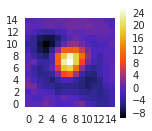

Coordinates of chosen px Y,X = 63,62
Central pixel SNR: 
SNR = 11.9379078535
Flux = 212.303, Mean Flux BKG aper = -5.804
Stddev BKG aper = 17.929
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 212.303
Mean SNR = 10.501
Max SNR = 13.698, stddev SNRs = 2.274
-----------------------------------------
Fitted Y,X = 63.249,61.936

_________________________________________
Input frame showing all the detected blobs
In red circles those that did not pass the SNR constraint
In cyan circles those that have and SNR >= 5


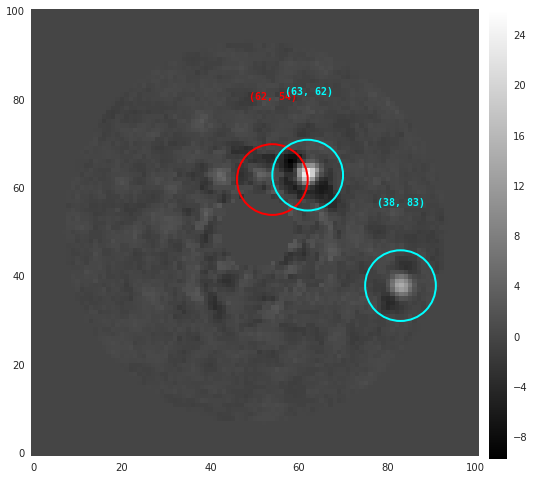

(array([38, 63]), array([83, 62]))

In [330]:
vip.phot.detection(fr_pca4, fwhm, psf, debug=False, mode='log', snr_thresh=5)

## 4. Additional stuff

This can be reproduced with other fits files, not provided:

### Bad frames detection

In [284]:
cube_2 = vortex.calib.cube_crop_frames(left, 211, 523, 477)


Cube cropped; new size [218,211,211] centered at (523,477).


In [285]:
ds9(cube_2)

In [300]:
import seaborn
seaborn.set_style('darkgrid') 
seaborn.set_palette("deep")
from IPython.html.widgets import FloatSlider as FlSlider
from IPython.html.widgets import Dropdown, interact_manual
from IPython.display import display, clear_output

def detect_badfr_widget(cube, method='corr', ref=0):
    """
    """
    def slider_vpxst(upsig):
        func = vip.calib.cube_detect_badfr_pxstats
        print "upper sigma = {}".format(upsig)
        fwhm = 4
        gind, bind = func(cube, mode='annulus', in_radius=fwhm, width=3*fwhm,
                          top_sigma=upsig, low_sigma=1, plot=True)
        #print "bad frames : {}".format(bind)
    def slider_corr(perc):
        func = vip.calib.cube_detect_badfr_correlation
        print "perc = {}".format(perc)
        gind, bind = func(cube, ref, dist='pearson', percentile=perc, plot=True)
        #print "bad frames : {}".format(bind)
    
    if method=='pxstat':
        interact_manual(slider_vpxst, upsig=FlSlider(min=0.0, max=2.0, 
                                                     value=1.0, step=0.1))
    elif method=='corr':
        interact_manual(slider_corr, perc=FlSlider(min=5.0, max=25.0,
                                                   value=17.0, step=0.5))



perc = 15.0
-------------------------------------------------------------------
Starting time: 2015-05-26 06:49:52
-------------------------------------------------------------------
Done detecting bad frames from cube: 33 out of 218 (15.1%)
Running time:  0:00:00.054150
-------------------------------------------------------------------


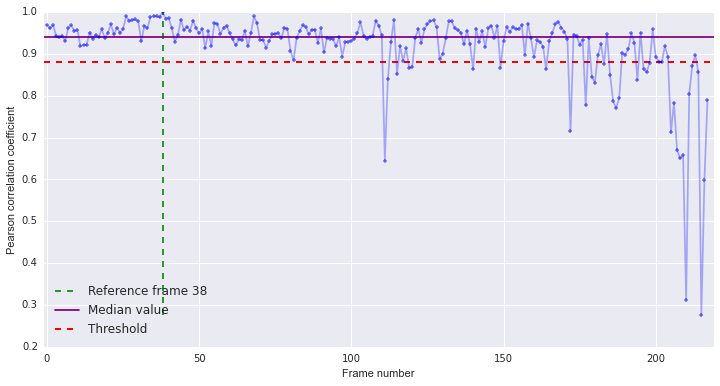

In [301]:
detect_badfr_widget(cube_2, method='corr', ref=38)

upper sigma = 1.9
-------------------------------------------------------------------
Starting time: 2015-05-26 06:48:22
-------------------------------------------------------------------
Done calculating stats in annulus
Done detecting bad frames from cube: 9 out of 218 (4.13%)
Running time:  0:00:00.388724
-------------------------------------------------------------------


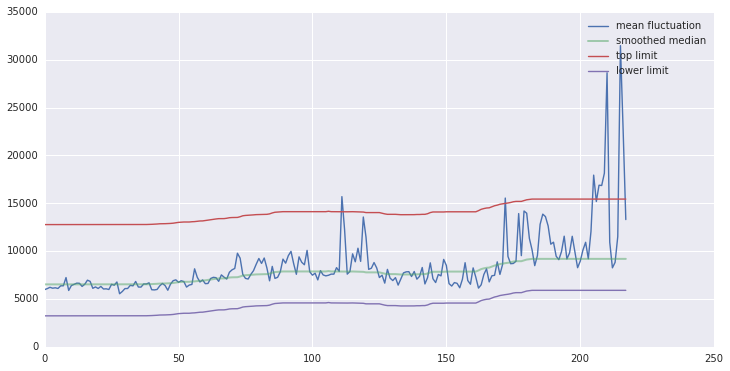

In [303]:
detect_badfr_widget(cube_2, method='pxstat', ref=38)

In [306]:
goind, baind = vip.calib.cube_detect_badfr_correlation(cube_2, 38,
                                                       dist='pearson', 
                                                       percentile=15)

-------------------------------------------------------------------
Starting time: 2015-05-26 06:50:09
-------------------------------------------------------------------
Done detecting bad frames from cube: 33 out of 218 (15.1%)
Running time:  0:00:00.015241
-------------------------------------------------------------------


In [307]:
print goind

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 113 114 116 117 118 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 141 142 143 144 145 146 147 148 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 165 166 167 168 169
 170 171 173 174 175 176 178 181 182 184 189 190 191 192 193 195 199 200
 201 202 203 204 213]


In [308]:
ds9(cube_2[goind])

### Center with Radon transform

Radon Transform maps lines onto points, we can then use speckles (and/or satellite spots) to estimate the location of the star in a coronagraphic image.

Location of the star is estimated by calculating the radon transform of a given broadband image over a grid of trial centers (x0,y0), and find the location that maximizes the modulus (square) of the Radon transform over the s = 0 horizontal axis.

In [314]:
fr_broad = vip.fits.open_fits(path_broad)
fr_broad = vip.calib.frame_crop(fr_broad, 201)


Fits HDU:0 data successfully loaded. Data shape: [940,940]

Done frame cropping


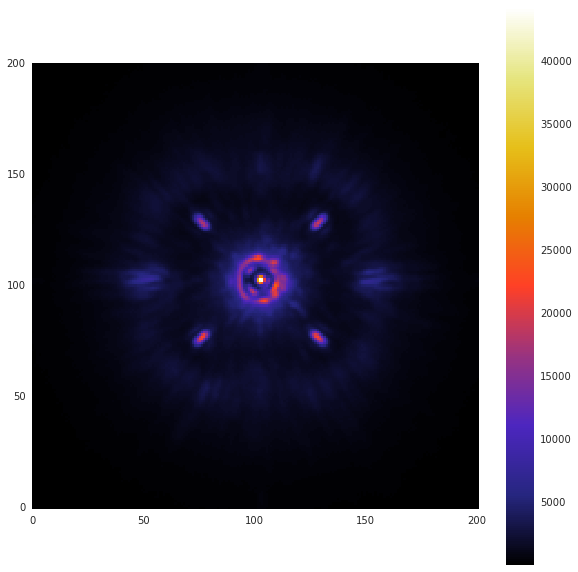

In [315]:
plots(fr_broad, size=10)

-------------------------------------------------------------------
Starting time: 2015-05-26 07:01:59
-------------------------------------------------------------------


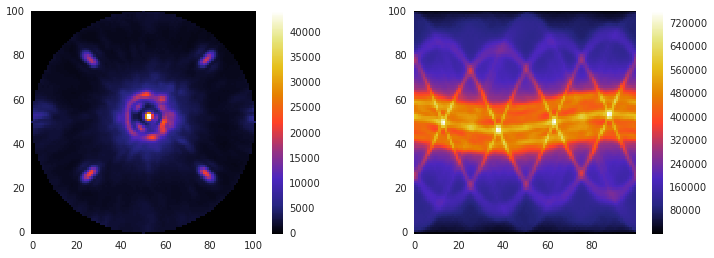

48551474.3833
Done 625 radon transform calls distributed in 4 processes


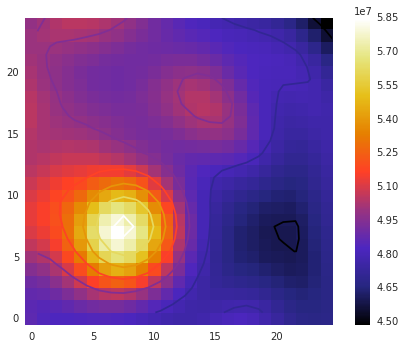

Cost function max: 58487179.8881
Finished grid search radon optimization. Y=-2.50000, X=-2.50000
Running time:  0:00:09.765127
-------------------------------------------------------------------


(-2.5, -2.5)

In [331]:
vip.calib.frame_center_radon(fr_broad, cropsize=101, wavelet=False, 
                             mask_center=None, hsize=6, step=0.5, nproc=4, 
                             debug=True)

In [332]:
fr_broad_shifted = vip.calib.frame_shift(fr_broad, -2.5, -2.5)

-------------------------------------------------------------------
Starting time: 2015-05-26 07:03:05
-------------------------------------------------------------------


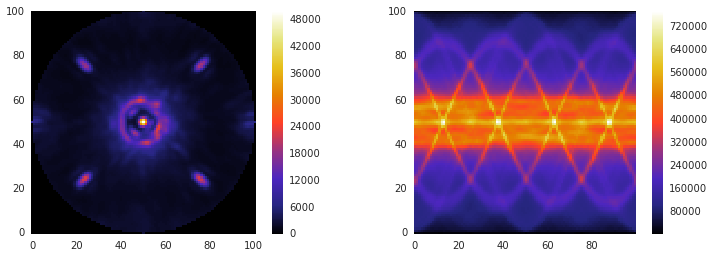

58079190.3004
Done 625 radon transform calls distributed in 4 processes


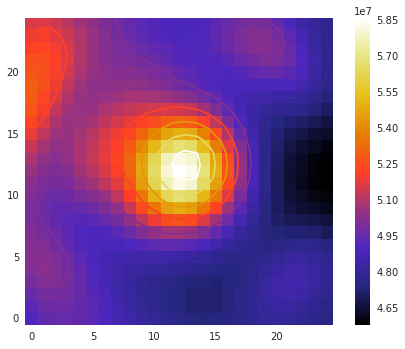

Cost function max: 58621052.0118
Finished grid search radon optimization. Y=0.00000, X=0.00000
Running time:  0:00:09.605984
-------------------------------------------------------------------


(0.0, 0.0)

In [333]:
vip.calib.frame_center_radon(fr_broad_shifted, cropsize=101, wavelet=False, 
                             mask_center=None, hsize=6, step=0.5, nproc=4, 
                             debug=True)

In [339]:
fr_broad_shifted2 = vip.calib.frame_shift(fr_broad_shifted, -1.5, -2.5)

-------------------------------------------------------------------
Starting time: 2015-05-26 07:07:36
-------------------------------------------------------------------


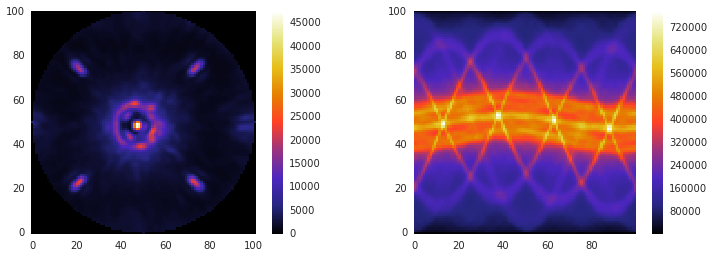

50170180.9601
Done 625 radon transform calls distributed in 4 processes


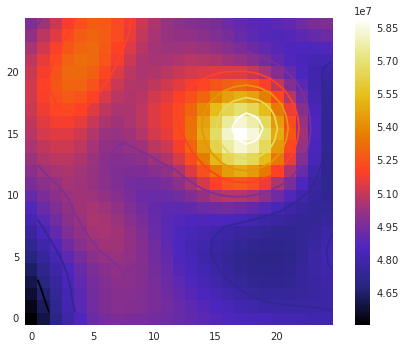

Cost function max: 58981365.3386
Finished grid search radon optimization. Y=1.50000, X=2.50000
Running time:  0:00:09.209363
-------------------------------------------------------------------


(1.5, 2.5)

In [340]:
vip.calib.frame_center_radon(fr_broad_shifted2, cropsize=101, wavelet=False, 
                             mask_center=None, hsize=6, step=0.5, nproc=4, 
                             debug=True)